In [45]:
import math
import matplotlib.pyplot as plt
from datetime import datetime
#colours
ts_teal = '#00DBBC'
ts_red ='#EB5347'
ts_yellow ='#EBC247'
ts_orange ='#FF8B25'
ts_purple ='#D65BB3'
ts_lblue ='#47C6EB'
ts_fusia ='#E82166'
ts_lime ='#BAEB47'
ts_sand ='#EB7347'
ts_dpurple ='#9747FF'
ts_pblue ='#87FFEE'
ts_dgreen ='#007564'
ts_gray ='#909090'
ts_green ='#00B20F'
ts_brown ='#BD7536'
ts_rblue ='#008BDB'
colours = [ts_teal,
            ts_red,
            ts_yellow,
            ts_orange ,
            ts_purple ,
            ts_lblue ,
            ts_fusia ,
            ts_lime ,
            ts_sand ,
            ts_dpurple ,
            ts_pblue ,
            ts_dgreen ,
            ts_gray ,
            ts_green ,
            ts_brown ,
            ts_rblue]
#plot in dark mode
plt.style.use('dark_background')

In [10]:
token_max = 21000000
blocks_day = 7200
days_entry = 10


In [11]:
## lets get all tao emission daily until we emit it all
tao_blocks =[]
#first entry is dtao launch
tao_blocks.append({"block":4920351, "timestamp":1739482871, "emitted_tao":8359419, "halving":0})


counter = 0 

emitted_tao  = 8359419
timestamp = 1739482871
halving = 0
block = 4920351
while emitted_tao < token_max-1:
    block +=7200*days_entry
    timestamp += 86400*days_entry
    emitted_tao += (7200*days_entry)*(0.5)**halving
    halving = math.floor(math.log((token_max - emitted_tao)/token_max)/math.log(0.5))
    tao_blocks.append({"block":block, "timestamp":timestamp, "emitted_tao":emitted_tao, "halving":halving})
    counter +=1
    if counter % 10 ==0:
        print({"block":block, "timestamp":timestamp, "emitted_tao":emitted_tao, "halving":halving})

{'block': 5640351, 'timestamp': 1748122871, 'emitted_tao': 9079419.0, 'halving': 0}
{'block': 6360351, 'timestamp': 1756762871, 'emitted_tao': 9799419.0, 'halving': 0}
{'block': 7080351, 'timestamp': 1765402871, 'emitted_tao': 10519419.0, 'halving': 1}
{'block': 7800351, 'timestamp': 1774042871, 'emitted_tao': 10879419.0, 'halving': 1}
{'block': 8520351, 'timestamp': 1782682871, 'emitted_tao': 11239419.0, 'halving': 1}
{'block': 9240351, 'timestamp': 1791322871, 'emitted_tao': 11599419.0, 'halving': 1}
{'block': 9960351, 'timestamp': 1799962871, 'emitted_tao': 11959419.0, 'halving': 1}
{'block': 10680351, 'timestamp': 1808602871, 'emitted_tao': 12319419.0, 'halving': 1}
{'block': 11400351, 'timestamp': 1817242871, 'emitted_tao': 12679419.0, 'halving': 1}
{'block': 12120351, 'timestamp': 1825882871, 'emitted_tao': 13039419.0, 'halving': 1}
{'block': 12840351, 'timestamp': 1834522871, 'emitted_tao': 13399419.0, 'halving': 1}
{'block': 13560351, 'timestamp': 1843162871, 'emitted_tao': 137

In [48]:
'''
subnets = [{"name": "OG_subnet",          "start": 1739482871,"price": .1, "emission_data":{}, "last_alpha_block":0, "last_alpha_timestamp":0}, 
            {"name": "second_halving_sn", "start": 1990042871,"price":  .1, "emission_data":{},"last_alpha_block":0, "last_alpha_timestamp":0}, 
            {"name": "fourth_halving_sn", "start": 2206042871,"price":  .1, "emission_data":{},"last_alpha_block":0, "last_alpha_timestamp":0}]
'''
subnets = [{"name": "OG_subnet1",          "start": 1739482871,"price": .01, "emission_data":{}, "last_alpha_block":0, "last_alpha_timestamp":0}, 
            {"name": "second_halving_sn", "start": 1990042871,"price":  .01, "emission_data":{},"last_alpha_block":0, "last_alpha_timestamp":0}, 
            {"name": "fourth_halving_sn", "start": 2206042871,"price":  .01, "emission_data":{},"last_alpha_block":0, "last_alpha_timestamp":0},
             {"name": "dtao_subnet",          "start": 1756762871,"price": .01, "emission_data":{}, "last_alpha_block":0, "last_alpha_timestamp":0},
             {"name": "first_halving_subnet",    "start": 1834522871,"price": .01, "emission_data":{}, "last_alpha_block":0, "last_alpha_timestamp":0},
          {"name": "first_halving_subnet2",    "start": 1877722871,"price": .01, "emission_data":{}, "last_alpha_block":0, "last_alpha_timestamp":0}]



#at each block we need to calculate the emission for each SN
for tao_block in tao_blocks:
    tao_block_number  = tao_block['block']
    if tao_block_number < 251880351:
        #get the tao details
        tao_time = tao_block['timestamp']
        tao_block_number  = tao_block['block']
        tao_halving = tao_block['halving']
        last_timestamp  = tao_time - 86400*days_entry

        for subnet in subnets:
            start = subnet['start']
            price = subnet['price']
            if start <= last_timestamp:
                
                #this subnet has started emitting alpha
                #lets get the halving at the last entry
                if last_timestamp in subnet['emission_data']:
                    alpha_halving = subnet['emission_data'][last_timestamp]['alpha_halving']
                    tao_in =subnet['emission_data'][last_timestamp]['tao_in']
                    alpha_in =subnet['emission_data'][last_timestamp]['alpha_in']
                    alpha_out = subnet['emission_data'][last_timestamp]['alpha_out']
                else:
                    #new subnet
                    alpha_halving=0
                    tao_in =1
                    alpha_in =1
                    alpha_out = 1
                #print(tao_time, subnet['name'], start, tao_halving, alpha_halving)
                alpha_block_number = tao_block_number
                alpha_time = tao_time
                total_alpha  = alpha_in + alpha_out
    
              
                block_tao_in = (7200*days_entry)* (0.5**tao_halving)*price 
                block_alpha_in = (7200*days_entry)*  ((0.5**tao_halving)*price)/price 
                tao_in +=   block_tao_in
                alpha_in += block_alpha_in
                #a_out is unchanged
                alpha_out +=(7200*days_entry) * (0.5**alpha_halving)
                total_alpha  = alpha_in + alpha_out
                if total_alpha <token_max-200:
                    alpha_halving = math.floor(math.log((token_max - total_alpha)/token_max)/math.log(0.5))
                    #print(alpha_time, "alpha_halving_math",alpha_halving)
                    #if alpha_halving ==2:
                        #print("total alpha",total_alpha)
                        
                    subnet['emission_data'][alpha_time] ={"block":alpha_block_number, "timestamp":alpha_time, "tao_in":tao_in, "alpha_in": alpha_in, "alpha_out": alpha_out,"alpha_halving":alpha_halving, "tao_halving": tao_halving}
                else:
                    subnet['emission_data'][alpha_time] = subnet['emission_data'][last_timestamp]
                    #the last block where alpha is emitted
                    if subnet['last_alpha_block'] ==0:
                        subnet['last_alpha_block'] = alpha_block_number
                        subnet['last_alpha_timestamp'] = alpha_time

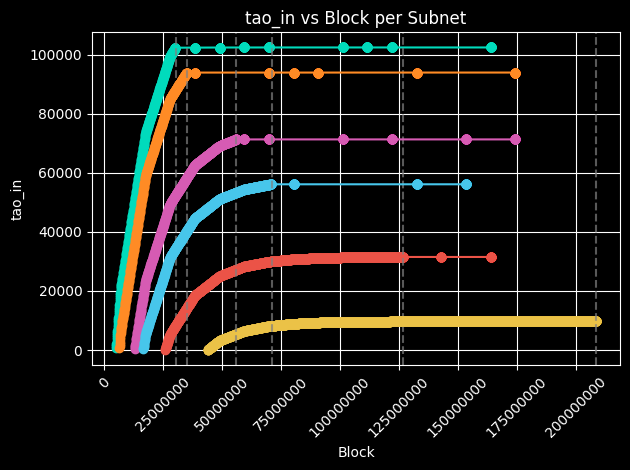

In [49]:
for i, subnet in enumerate(subnets):
    emission_data = list(subnet["emission_data"].values())
    blocks = [d["block"] for d in emission_data]
    tao_in = [d["tao_in"] for d in emission_data]
    alpha_in = [d["alpha_in"] for d in emission_data]
    plt.plot(blocks, tao_in, marker="o", label=subnet["name"], color = colours[i])
    # add vertical line if last_alpha_block exists
    if "last_alpha_block" in subnet:
        plt.axvline(
            x=subnet["last_alpha_block"],
            color="gray",
            linestyle="--",
            alpha=0.7,
            label=f"{subnet['name']} last_alpha_block"
        )

chart_data = alpha_in

plt.xlabel("Block")
plt.ylabel("tao_in")
plt.title("tao_in vs Block per Subnet")
#plt.legend()
plt.grid(True)

# Force full block numbers and rotate
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
for subnet in subnets:
    temp_time = subnet['last_alpha_timestamp']
    date_str = datetime.utcfromtimestamp(temp_time).strftime("%m/%d/%Y")
    print(subnet['name'], date_str)

OG_subnet1 10/04/2034
second_halving_sn 06/22/2071
fourth_halving_sn 08/09/2102
dtao_subnet 07/25/2036
first_halving_subnet 07/03/2044
first_halving_subnet2 04/03/2050
